<a href="https://colab.research.google.com/github/biondo999/Cfd/blob/main/solver_variational_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2023-09-29 13:29:20--  https://fem-on-colab.github.io/releases/firedrake-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4581 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.47K  --.-KB/s    in 0s      

2023-09-29 13:29:20 (29.8 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4581/4581]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/4e2d907/rele

In [2]:
from firedrake import *
import numpy as np
import matplotlib.pyplot as plt

In [40]:
omega=8*np.pi
r=80
def u_exact(x):
  return 0.1*np.sin(omega*x) + np.tanh(r*x)

In [41]:

n=32
a=-1
b=1

mesh = IntervalMesh (n ,a,b)


mesh_coords = mesh.coordinates.dat.data

x_values=mesh_coords

V = FunctionSpace (mesh,'CG',1)


h = (b-a)/n

# Print the cell size (element length)
print("Cell size (element length):", h)




Cell size (element length): 0.0625


In [42]:
print(mesh_coords)

[-1.     -0.9375 -0.875  -0.8125 -0.75   -0.6875 -0.625  -0.5625 -0.5
 -0.4375 -0.375  -0.3125 -0.25   -0.1875 -0.125  -0.0625  0.      0.0625
  0.125   0.1875  0.25    0.3125  0.375   0.4375  0.5     0.5625  0.625
  0.6875  0.75    0.8125  0.875   0.9375  1.    ]


In [43]:
x=SpatialCoordinate(mesh)


f=(0.1*(omega**2)*sin(omega*x[0])) +((2*r**2)*(tanh(r*x[0]))/((cosh(r*x[0]))*(cosh(r*x[0]))))

u = TrialFunction (V)
v = TestFunction (V)


a = dot ( grad (u), grad (v)) * dx
L = f * v * dx

g1= Constant((-1.0))
g2= Constant((1.0))
bc1= DirichletBC(V.sub(0),g1,1)
bc2=DirichletBC(V.sub(0),g2,2)

bcs=(bc1,bc2)

u_h = Function (V)
solve (a == L, u_h,bcs=bcs)

In [44]:
u_h_values = u_h.vector().get_local()
print(u_h_values)

[-1.00000000e+00 -9.00411104e-01 -1.00082221e+00 -1.10123331e+00
 -1.00164442e+00 -9.02055521e-01 -1.00246662e+00 -1.10287773e+00
 -1.00328883e+00 -9.03699937e-01 -1.00411104e+00 -1.10452215e+00
 -1.00493325e+00 -9.05344354e-01 -1.00575545e+00 -1.10607575e+00
 -2.28388736e-15  1.10607575e+00  1.00575545e+00  9.05344354e-01
  1.00493325e+00  1.10452215e+00  1.00411104e+00  9.03699937e-01
  1.00328883e+00  1.10287773e+00  1.00246662e+00  9.02055521e-01
  1.00164442e+00  1.10123331e+00  1.00082221e+00  9.00411104e-01
  1.00000000e+00]


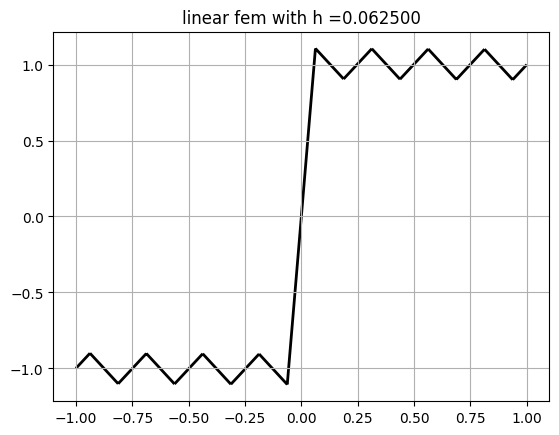

In [45]:
firedrake.plot(u_h)

# Display the plot
import matplotlib.pyplot as plt
plt.title('linear fem with h =%f' %h)
plt.grid()
plt.show()


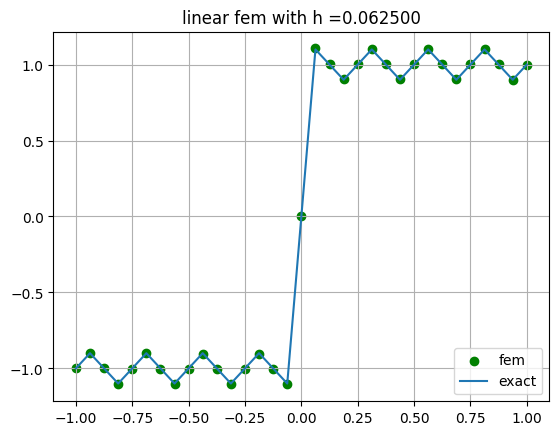

In [46]:
plt.scatter(x_values,u_h_values,color='g')
plt.plot(x_values,u_exact(x_values))

plt.title('linear fem with h =%f' %h)
plt.grid()
plt.legend(["fem", "exact"], loc ="lower right")
plt.show()


In [47]:
u_ex = 0.1*sin(omega*x[0]) + tanh(r*x[0])


In [48]:


errL2=sqrt(assemble(inner(u_h-u_ex,u_h-u_ex)*dx))
errH1=sqrt(assemble(inner(grad(u_h-u_ex),grad(u_h-u_ex))*dx))


In [49]:
print(errL2)
print(errH1)

0.14919043256774114
8.895385750945348


In [62]:
H=[]
E_L2=[]
E_H1=[]

N=[4,8,16,32,64,128,256]


for elem in N:
    n=elem
    a=-1
    b=1

    mesh = IntervalMesh (n ,a,b)


    mesh_coords = mesh.coordinates.dat.data

    x_values=mesh_coords

    V = FunctionSpace (mesh,'CG',1)


    h = (b-a)/n

    # Print the cell size (element length)
    print("Cell size (element length):", h)



    x=SpatialCoordinate(mesh)


    f=(0.1*(omega**2)*sin(omega*x[0])) +((2*r**2)*(tanh(r*x[0]))/((cosh(r*x[0]))*(cosh(r*x[0]))))

    u = TrialFunction (V)
    v = TestFunction (V)


    a = dot ( grad (u), grad (v)) * dx
    L = f * v * dx

    g1= Constant((-1.0))
    g2= Constant((1.0))
    bc1= DirichletBC(V.sub(0),g1,1)
    bc2=DirichletBC(V.sub(0),g2,2)

    bcs=(bc1,bc2)

    u_h = Function (V)
    solve (a == L, u_h,bcs=bcs)

    u_ex = 0.1*sin(omega*x[0]) + tanh(r*x[0])

    errL2=sqrt(assemble(inner(u_h-u_ex,u_h-u_ex)*dx))
    errH1=sqrt(assemble(inner(grad(u_h-u_ex),grad(u_h-u_ex))*dx))

    E_L2.append(errL2)
    E_H1.append(errH1)
    H.append(h)

H=np.array(H)


Cell size (element length): 0.5
Cell size (element length): 0.25
Cell size (element length): 0.125
Cell size (element length): 0.0625
Cell size (element length): 0.03125
Cell size (element length): 0.015625
Cell size (element length): 0.0078125


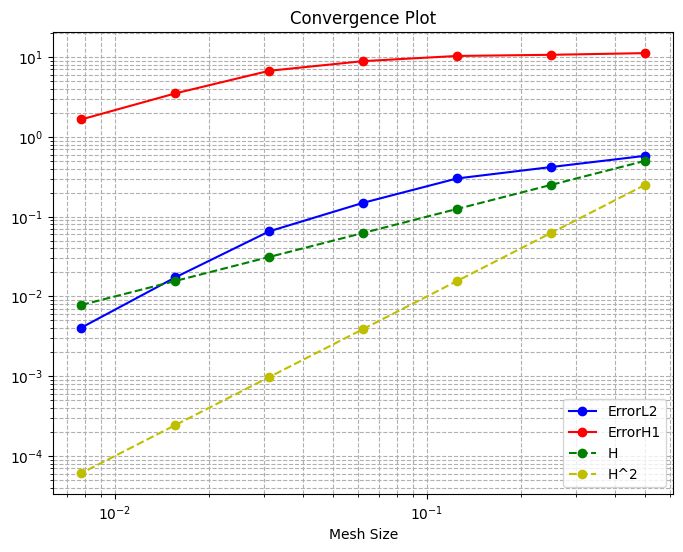

In [64]:
plt.figure(figsize=(8, 6))
plt.loglog(H, E_L2, marker='o', linestyle='-', color='b', label='ErrorL2')
plt.loglog(H, E_H1, marker='o', linestyle='-', color='r', label='ErrorH1')
plt.loglog(H, H, marker='o', linestyle='--', color='g', label='H')
plt.loglog(H, H**2, marker='o', linestyle='--', color='y', label='H^2')
plt.xlabel('Mesh Size')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()